In [1]:
# generating a small dataset
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
# generaate one dimensional dataset
sz = 500
input_feature = np.random.rand(sz , 1)
output = 2 + 3 * input_feature + np.random.randn(sz , 1)

original_data = np.hstack((input_feature  , output ))
print(original_data.shape)

(500, 2)


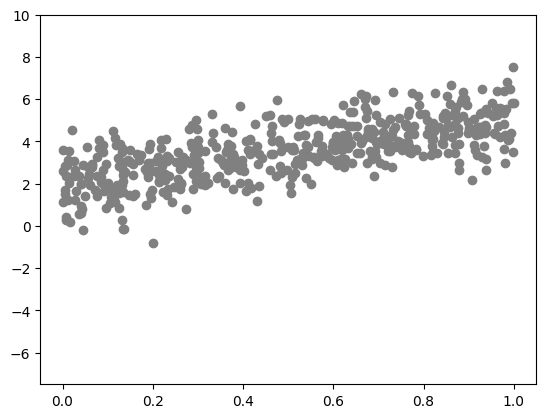

In [3]:
import matplotlib.pyplot as plt
plt.scatter(input_feature , output , color = 'grey')
plt.gca().set_ylim(-7.5  , 10)
plt.show()

In [4]:
#introducing small out liears
li = np.random.rand(20 , 1 )
out_li =  6 * np.random.randn(20 , 1)


lier_input = np.vstack((input_feature, li) )
lier_output = np.vstack((output , out_li ))
data_with_outlier = np.hstack((lier_input , lier_output))

In [5]:
print(lier_input.shape)
print(lier_output.shape)
print(data_with_outlier.shape )

(520, 1)
(520, 1)
(520, 2)


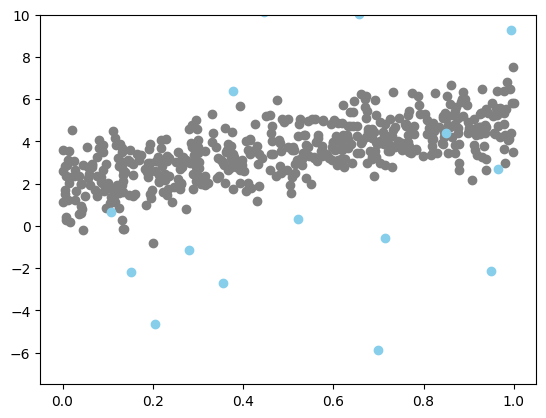

In [6]:
plt.scatter(input_feature , output , color = 'grey')
plt.scatter(li , out_li , color = 'skyblue')
plt.gca().set_ylim(-7.5  , 10)
plt.show()

In [7]:
# implimenting linear regresssion on original dataset

class LinearReg :
  def __init__( self ,lr = 0.1 , epoch = 1000):
    self.lr = lr
    self.epoch = epoch
    self.w = 0.0
    self.b = 0.0
    self.calc_loss = np.inf

  def y_predition ( self , inp ):
    return (self.w * inp ) + self.b

  def mse_loss (self , y_pred , outp ):
    return np.mean(np.square(outp - y_pred))

  def mse_grad (self , y_pred , outp  ):
    return ( y_pred - outp ) * 2


  def mae_loss ( self , y_pred , outp ):
    return np.mean(np.abs(y_pred -   outp))

  def mae_grad (self , y_pred , outp ):
    return np.sign( y_pred - outp )

  def fit (self , inp , outp , loss_fun = 'mse'):
    for iter in range(self.epoch):
      y_pred = self.y_predition(inp)
      if (loss_fun == 'mse'):
        self.calc_loss = self.mse_loss(y_pred , outp )
        calc_grad = self.mse_grad(y_pred , outp )
      else :
        self.calc_loss = self.mae_loss(y_pred , outp )
        calc_grad = self.mae_grad(y_pred , outp)
      self.w = self.w - self.lr * np.mean(calc_grad * inp )
      self.b = self.b - self.lr * np.mean(calc_grad )


In [8]:
model_mse = LinearReg(lr = 0.1 , epoch = 100)
model_mae = LinearReg(lr = 0.1 , epoch = 100)

In [9]:
model_mse.fit(input_feature , output , loss_fun = 'mse')
model_mae.fit(input_feature , output ,loss_fun = 'mae')

In [10]:
print(model_mse.w , model_mse.b )
print(model_mae.w , model_mae.b )

2.7342368832059876 2.216513398744885
2.0069428672504483 2.5895999999999963


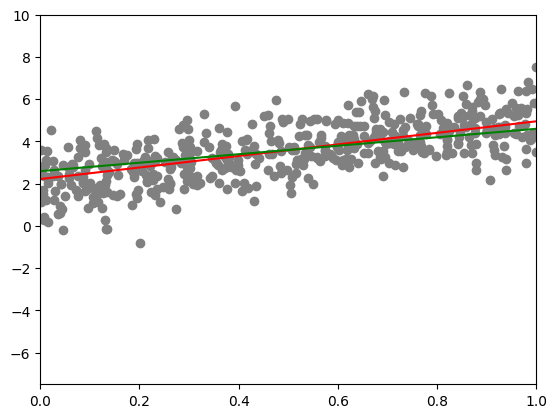

In [11]:
plt.scatter(input_feature , output , color = 'grey')
plt.plot( [0,1] , [0 *model_mse.w +  model_mse.b, 1 *model_mse.w +  model_mse.b ] , color = 'red')
plt.plot( [0,1] , [0 *model_mae.w +  model_mae.b, 1 *model_mae.w +  model_mae.b ] , color = 'green')
plt.gca().set_ylim(-7.5  , 10)
plt.gca().set_xlim(0,1)
plt.show()

In [12]:
model_mse_out = LinearReg(lr = 0.1 , epoch = 100)
model_mae_out= LinearReg(lr = 0.1 , epoch = 100)


model_mse_out.fit(lier_input , lier_output , loss_fun = 'mse')
model_mae_out.fit(input_feature , output ,loss_fun = 'mae')

In [13]:
print(model_mse_out.w , model_mse_out.b )
print(model_mae_out.w , model_mae_out.b )

2.645942804506238 2.100058114777419
2.0069428672504483 2.5895999999999963


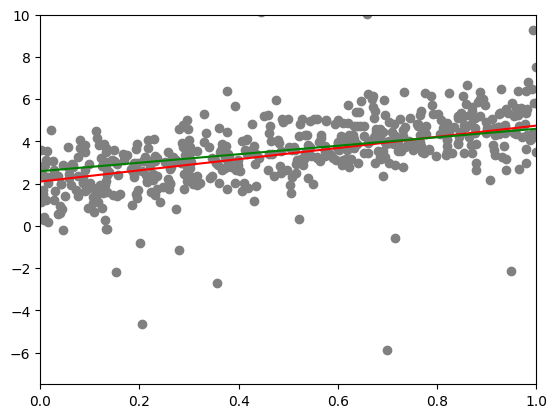

In [14]:
plt.scatter(lier_input , lier_output , color = 'grey')
plt.plot( [0,1] , [0 *model_mse_out.w +  model_mse_out.b, 1 *model_mse_out.w +  model_mse_out.b ] , color = 'red')
plt.plot( [0,1] , [0 *model_mae_out.w +  model_mae_out.b, 1 *model_mae_out.w +  model_mae_out.b ] , color = 'green')
plt.gca().set_ylim(-7.5  , 10)
plt.gca().set_xlim(0,1)
plt.show()

In [15]:
# MAE is more robust to outliers than MSE
# error increase three times from without outlier model

print("Increase in MSE :",model_mse_out.calc_loss/model_mse.calc_loss)
print("Increase in MAE :",model_mae_out.calc_loss/model_mae.calc_loss)

Increase in MSE : 3.7979758422540773
Increase in MAE : 1.0
